In [1]:
import idx2numpy
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import gzip
import umap
import matplotlib.pyplot as plt
import seaborn as sns

### 1) In order to run the code, need to change the image and label file path to correct file paths)

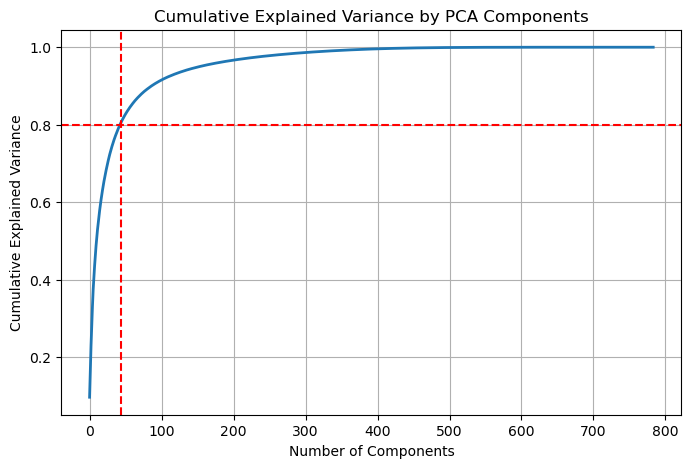

((60000, 28, 28), (60000,))

In [3]:
image_file_gz = r'C:\Users\soong\OneDrive - Nanyang Technological University\Y3S1\机器学习\作业\HW8\train-images-idx3-ubyte.gz'
label_file_gz = r'C:\Users\soong\OneDrive - Nanyang Technological University\Y3S1\机器学习\作业\HW8\train-labels-idx1-ubyte.gz'

def read_idx_from_gzip(gzip_file_path):
    with gzip.open(gzip_file_path, 'rb') as f:
        return idx2numpy.convert_from_file(f)

images = read_idx_from_gzip(image_file_gz)
labels = read_idx_from_gzip(label_file_gz)

num_images, img_height, img_width = images.shape
images_reshaped = images.reshape((num_images, img_height * img_width))

pca = PCA()
pca.fit(images_reshaped)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components_80_variance = np.argmax(cumulative_variance >= 0.80) + 1

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.axvline(x=num_components_80_variance, color='r', linestyle='--')
plt.grid(True)

plt.show()

num_components_80_variance

(images.shape, labels.shape)


### 2)

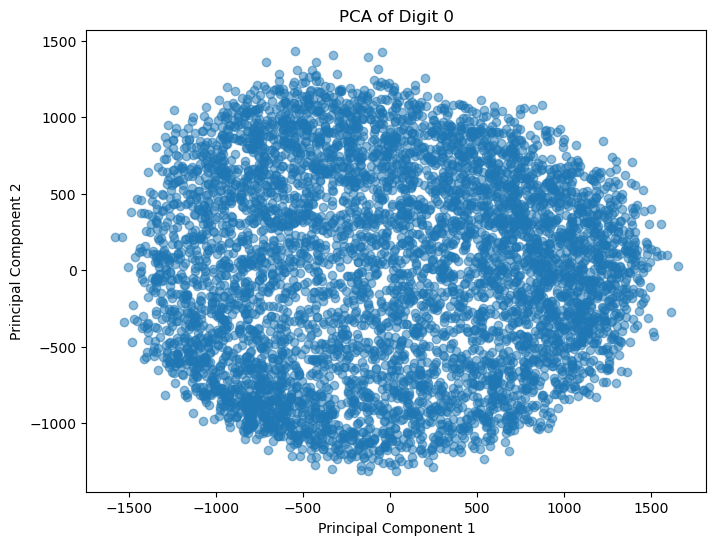

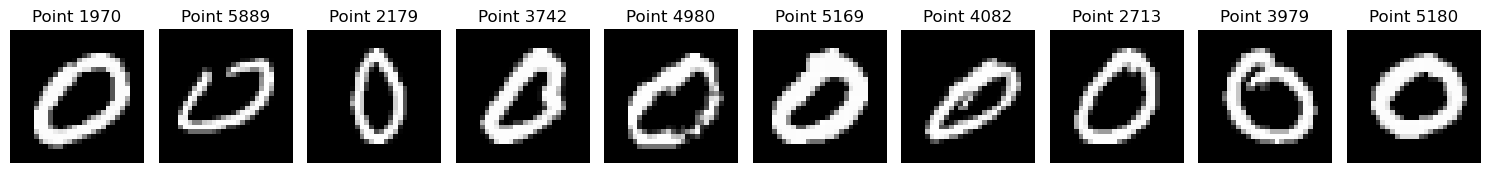

In [4]:
selected_digit = 0
selected_images = images[labels == selected_digit]
selected_images_reshaped = selected_images.reshape((-1, 28 * 28))

pca = PCA(n_components=2)
transformed_images = pca.fit_transform(selected_images_reshaped)

plt.figure(figsize=(8, 6))
plt.scatter(transformed_images[:, 0], transformed_images[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA of Digit {selected_digit}')
plt.show()

num_samples_to_show = 10
indices_to_show = np.random.choice(transformed_images.shape[0], num_samples_to_show, replace=False)

fig, axes = plt.subplots(1, num_samples_to_show, figsize=(15, 3))
for i, ax in zip(indices_to_show, axes.flatten()):
    # Reshape the image data from (784,) to (28, 28) before displaying
    image = selected_images[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Point {i}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### 3)

C:\Users\soong\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\soong\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\soong\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


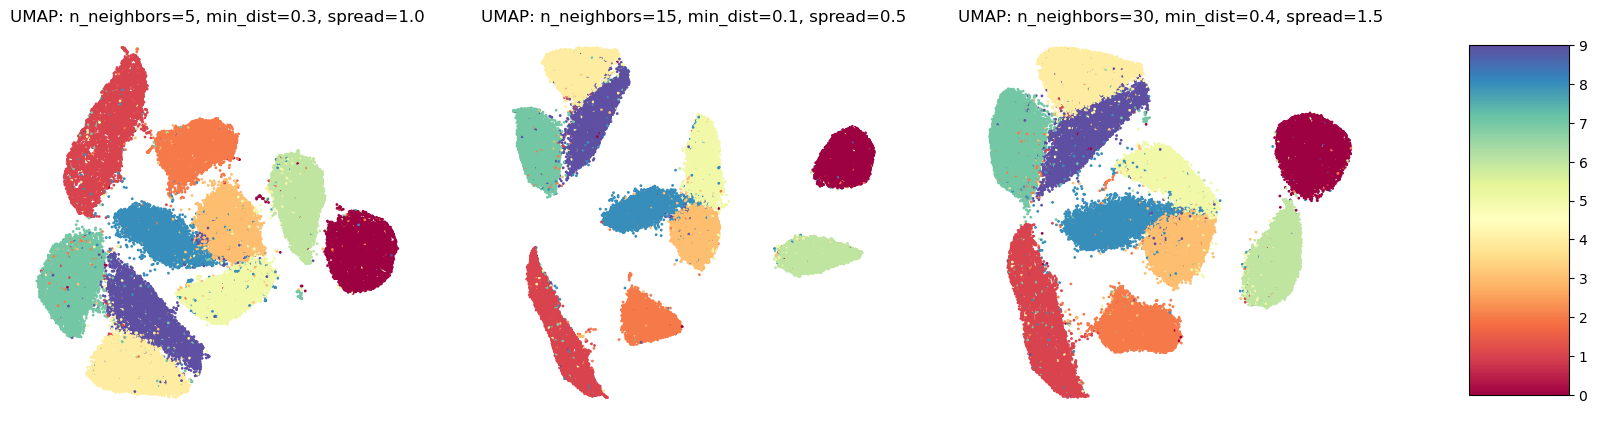

In [5]:
umap_params = [
    {'n_neighbors': 5, 'min_dist': 0.3, 'spread': 1.0},
    {'n_neighbors': 15, 'min_dist': 0.1, 'spread': 0.5},
    {'n_neighbors': 30, 'min_dist': 0.4, 'spread': 1.5},
]

fig, axes = plt.subplots(1, len(umap_params), figsize=(20, 5))
for i, params in enumerate(umap_params):
    reducer = umap.UMAP(n_neighbors=params['n_neighbors'],
                        min_dist=params['min_dist'],
                        spread=params['spread'],
                        random_state=42)
    embedding = reducer.fit_transform(images_reshaped)
    
    scatter = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=1)
    axes[i].set_title(f"UMAP: n_neighbors={params['n_neighbors']}, min_dist={params['min_dist']}, spread={params['spread']}")
    axes[i].axis('off')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(scatter, cax=cbar_ax)

plt.show()
